## Some code to test things on the maximal sum introduced in the classroom

### The problem:

Find the maximal sum in a list of integers. 

Given a list of integers $A$ of length N, find a sublist A[i:j] such that $\sum_{k=i}^{j-1} A[k]$ is greater or equal than the sum of every other interval.


A simpler version:
Find the maximal sum, rather than the interval that provides the maximal sum.

List size: 5
Max sum is: 362. Used: 104 bytes
Max sum is: 362. Used: 192 bytes
Max sum is: 362. Used: 384 bytes
List size: 10
Max sum is: 913. Used: 184 bytes
Max sum is: 913. Used: 1,072 bytes
Max sum is: 913. Used: 2,144 bytes
List size: 30
Max sum is: 2189. Used: 424 bytes
Max sum is: 2189. Used: 9,024 bytes
Max sum is: 2189. Used: 18,048 bytes
List size: 50
Max sum is: 4406. Used: 824 bytes
Max sum is: 4406. Used: 38,216 bytes
Max sum is: 4406. Used: 76,432 bytes
List size: 75
Max sum is: 7743. Used: 1,424 bytes
Max sum is: 7743. Used: 124,920 bytes
Max sum is: 7743. Used: 249,840 bytes
List size: 100
Max sum is: 12515. Used: 2,224 bytes
Max sum is: 12515. Used: 321,104 bytes
Max sum is: 12515. Used: 642,208 bytes
List size: 200
Max sum is: 21412. Used: 3,824 bytes
Max sum is: 21412. Used: 927,568 bytes
Max sum is: 21412. Used: 1,855,136 bytes
List size: 500
Max sum is: 43788. Used: 7,824 bytes
Max sum is: 43788. Used: 3,813,304 bytes
Max sum is: 43788. Used: 7,626,608 bytes
List s

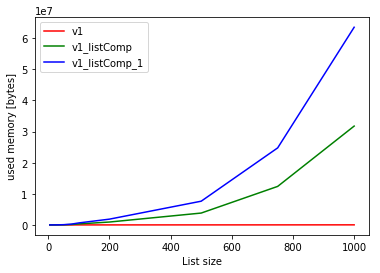

In [1]:
import sys
import matplotlib.pyplot as plt

%matplotlib inline 

#Solution 1 - O(N^3)

def max_sum_v1(A):
    max_so_far = 0
    N = len(A)
    max_space_occupied = 0
    for i in range(N):
        for j in range(i,N):
            tmp_sum = sum (A[i:j+1])
            max_so_far = max(tmp_sum, max_so_far)
            max_space_occupied = max(max_space_occupied, 
                                sys.getsizeof(tmp_sum),
                                sys.getsizeof(max_so_far),
                                sys.getsizeof(A[i:j+1]))
    
    return max_so_far, max_space_occupied

def max_sum_v1_listc_1(A):
    N = len(A)
    max_space_occupied = 0
    sums = [sum(A[i:j+1]) for i in range(N) for j in range(i,N)]
    
    max_space_occupied =  sys.getsizeof(sums)
    return max(sums),max_space_occupied


def max_sum_v1_listc(A):
    N = len(A)
    max_space_occupied = 0
    intervals = [A[i:j+1] for i in range(N) for j in range(i,N)]
    sums = [sum(vals) for vals in intervals]
    max_space_occupied = sys.getsizeof(intervals) + sys.getsizeof(sums)
    return max(sums),max_space_occupied


#A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
import random
A = []
labels = ["v1", "v1_listComp", "v1_listComp_1"]
space_by_algo = [[],[],[]]
inputs = [5,10,30,50, 75,100,200, 500, 750, 1000]#,1200]
for N in inputs:
    print("List size: {}".format(N))
    for i in range(N):
        A.append(random.randint(-10,100))
    ms,space = max_sum_v1(A)
    space_by_algo[0].append(space)
    print("Max sum is: {}. Used: {:,} bytes".format(ms,space))
    ms,space = max_sum_v1_listc_1(A)
    space_by_algo[1].append(space)
    print("Max sum is: {}. Used: {:,} bytes".format(ms, space))
    ms,space = max_sum_v1_listc(A)
    print("Max sum is: {}. Used: {:,} bytes".format(ms, space))
    space_by_algo[2].append(space)

print(inputs)
for i in range(len(space_by_algo)):
    print(space_by_algo[i])

plt.plot(inputs, space_by_algo[0], 'r',
         inputs, space_by_algo[1], 'g', 
         inputs, space_by_algo[2], 'b')
plt.xlabel("List size")
plt.ylabel("used memory [bytes]")
plt.legend(labels)
plt.show()
# How much space does it take?
#import sys
#import random

#a = list()
#print("Empty list uses: {} bytes".format(sys.getsizeof(a)))
#for i in range(100000000):
#    a.append(random.randint(0,10000))
#print("List with {:,} elements uses: {} bytes".format( i+1, sys.getsizeof(a)))

[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
[1, 4, 8, 0, 2, 5, 4, 7, 11, 8, 18, 15, 17]
18
18
18
18
18
List size: 5
Max sum is: 108. Used: 104 bytes
Max sum is: 108. Used: 28 bytes
Max sum is: 108. Used: 64 bytes
List size: 10
Max sum is: 367. Used: 184 bytes
Max sum is: 367. Used: 28 bytes
Max sum is: 367. Used: 64 bytes
List size: 30
Max sum is: 1870. Used: 424 bytes
Max sum is: 1870. Used: 28 bytes
Max sum is: 1870. Used: 64 bytes
List size: 50
Max sum is: 4156. Used: 824 bytes
Max sum is: 4156. Used: 28 bytes
Max sum is: 4156. Used: 64 bytes
List size: 75
Max sum is: 7325. Used: 1,424 bytes
Max sum is: 7325. Used: 28 bytes
Max sum is: 7325. Used: 64 bytes
List size: 100
Max sum is: 11601. Used: 2,224 bytes
Max sum is: 11601. Used: 28 bytes
Max sum is: 11601. Used: 64 bytes
List size: 200
Max sum is: 20801. Used: 3,824 bytes
Max sum is: 20801. Used: 28 bytes
Max sum is: 20801. Used: 64 bytes
List size: 500
Max sum is: 43300. Used: 7,824 bytes
Max sum is: 43300. Used: 28 bytes
Max s

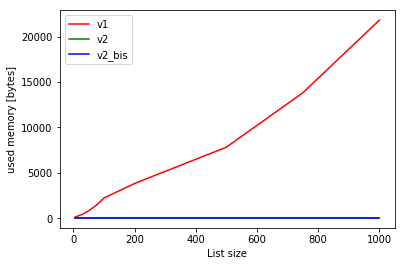

In [28]:
import sys

#Version 1:


def max_sum_v1(A):
    max_so_far = 0
    N = len(A)
    max_space_occupied = 0
    for i in range(N):
        for j in range(i,N):
            tmp_sum = sum (A[i:j+1])
            max_so_far = max(tmp_sum, max_so_far)
            max_space_occupied = max(max_space_occupied, 
                                sys.getsizeof(tmp_sum),
                                sys.getsizeof(max_so_far),
                                sys.getsizeof(A[i:j+1]))
    
    return max_so_far, max_space_occupied

#Version 2:

def max_sum_v2(A):
    N = len(A)
    max_so_far = 0
    space = 0
    for i in range(N):
        tot = 0 #ACCUMULATOR!
        for j in range(i,N):
            tot = tot + A[j]
            max_so_far = max(max_so_far, tot)
            space = max(space, sys.getsizeof(tot), sys.getsizeof(max_so_far),  sys.getsizeof(A[j]))
    return max_so_far,space

from itertools import accumulate
def max_sum_v2_bis(A):
    N = len(A)
    max_so_far = 0
    space = 0
    for i in range(N):
        tot = max(accumulate(A[i:]))
        max_so_far = max(max_so_far,tot)
        space = max(space, 
                    sys.getsizeof(tot), 
                    sys.getsizeof(max_so_far), 
                    sys.getsizeof(accumulate(A[i:])))
    return max_so_far, space




def max_sum_v3_rec(A, i, j):
    if i == j:
        return max(0, A[i])
    m = (i+j)//2
    maxML = 0
    s = 0
    for k in range(m,i-1,-1):
        s = s + A[k]
        maxML = max(maxML, s)
    
    maxMR = 0
    s = 0
    for k in range(m+1, j+1):
        s = s + A[k]
        maxMR = max(maxMR, s)
    maxL = max_sum_v3_rec(A,i,m) #Left maximal subvector
    maxR = max_sum_v3_rec(A,m+1,j) #Right maximal subvector
    
    return max(maxL, maxR, maxML + maxMR)


def max_sum_v3_rec_bis(A,i,j):
    if i == j:
        return max(0,A[i])
    m = (i+j)//2
    maxL = max_sum_v3_rec_bis(A,i,m)
    maxR = max_sum_v3_rec_bis(A, m+1, j)
    maxML = max(accumulate(A[m:-len(A) + i -1: -1]))
    maxMR = max(accumulate(A[m+1:j+1]))
    return max(maxL, maxR, maxML+ maxMR)

def max_sum_v3(A):
    return max_sum_v3_rec_bis(A,0,len(A) - 1)


def max_sum_v4(A):
    max_so_far = 0
    max_here = 0
    for val in A:
        max_here = max(val + max_here, 0)
        max_so_far = max(max_so_far, max_here)
    return max_so_far


A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print(A)
print(list(accumulate(A)))
res, _ = max_sum_v1(A)
print(res)
res, _ = max_sum_v2(A)
print(res)
res, _ = max_sum_v2_bis(A)
print(res)
res = max_sum_v3(A)
print(res)
res = max_sum_v4(A)
print(res)

import random
A = []
labels = ["v1", "v2", "v2_bis"]
space_by_algo = [[],[],[]]
inputs = [5,10,30,50, 75,100,200, 500, 750, 1000]#,1200]
for N in inputs:
    print("List size: {}".format(N))
    for i in range(N):
        A.append(random.randint(-10,100))
    ms,space = max_sum_v1(A)
    space_by_algo[0].append(space)
    print("Max sum is: {}. Used: {:,} bytes".format(ms,space))
    ms,space = max_sum_v2(A)
    space_by_algo[1].append(space)
    print("Max sum is: {}. Used: {:,} bytes".format(ms,space))
    ms,space = max_sum_v2_bis(A)
    space_by_algo[2].append(space)
    print("Max sum is: {}. Used: {:,} bytes".format(ms,space))
    

print(inputs)
for i in range(len(space_by_algo)):
    print(space_by_algo[i])

plt.plot(inputs, space_by_algo[0], 'r',
         inputs, space_by_algo[1], 'g', 
         inputs, space_by_algo[2], 'b')
plt.xlabel("List size")
plt.ylabel("used memory [bytes]")
plt.legend(labels)
plt.show()

In [1]:
A = list(range(10))
print(A)

#interval 4-2 going to the left...
M = 4
i = 2
print(-len(A) + i - 1)
A[M: -len(A) + i -1 : -1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
-9


[4, 3, 2]

In [1]:
def max_sum_v1(A):
    max_so_far = 0
    N = len(A)
    for i in range(N):
        for j in range(i,N):
            tmp_sum = sum (A[i:j+1])
            max_so_far = max(tmp_sum, max_so_far)
    
    return max_so_far

A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print(A)
print(max_sum_v1(A))

[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
18


In [9]:
def max_sum_v1_listc_1(A):
    N = len(A)
    sums = [sum(A[i:j+1]) for i in range(N) for j in range(i,N)]
    
    print(sums)
    print(len(sums))
    return max(sums)

A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print(len(A))
print(A)
print(max_sum_v1_listc_1(A))
intervals = [(i,j) for i in range(len(A)) for j in range(i, len(A))]
print(intervals)
print(len(intervals))

13
[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
[1, 4, 8, 0, 2, 5, 4, 7, 11, 8, 18, 15, 17, 3, 7, -1, 1, 4, 3, 6, 10, 7, 17, 14, 16, 4, -4, -2, 1, 0, 3, 7, 4, 14, 11, 13, -8, -6, -3, -4, -1, 3, 0, 10, 7, 9, 2, 5, 4, 7, 11, 8, 18, 15, 17, 3, 2, 5, 9, 6, 16, 13, 15, -1, 2, 6, 3, 13, 10, 12, 3, 7, 4, 14, 11, 13, 4, 1, 11, 8, 10, -3, 7, 4, 6, 10, 7, 9, -3, -1, 2]
91
18
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12),

In [10]:
def max_sum_v1_listc(A):
    N = len(A)
    intervals = [A[i:j+1] for i in range(N) for j in range(i,N)]
    sums = [sum(vals) for vals in intervals]
    return max(sums)

A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print(A)
print(max_sum_v1_listc(A))

[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
18


In [16]:
def max_sum_v2(A):
    N = len(A)
    max_so_far = 0
    totals = []
    maxes = []
    for i in range(N):
        tot = 0 #ACCUMULATOR!
        totals.append(tot)
        for j in range(i,N):
            tot = tot + A[j]
            totals.append(tot)
            max_so_far = max(max_so_far, tot)
            maxes.append(max_so_far)
    print("Totals")
    print(totals)
    print("Maxes")
    print(len(maxes))
    return max_so_far

A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print(A)
print(max_sum_v2(A))

[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
Totals
[0, 1, 4, 8, 0, 2, 5, 4, 7, 11, 8, 18, 15, 17, 0, 3, 7, -1, 1, 4, 3, 6, 10, 7, 17, 14, 16, 0, 4, -4, -2, 1, 0, 3, 7, 4, 14, 11, 13, 0, -8, -6, -3, -4, -1, 3, 0, 10, 7, 9, 0, 2, 5, 4, 7, 11, 8, 18, 15, 17, 0, 3, 2, 5, 9, 6, 16, 13, 15, 0, -1, 2, 6, 3, 13, 10, 12, 0, 3, 7, 4, 14, 11, 13, 0, 4, 1, 11, 8, 10, 0, -3, 7, 4, 6, 0, 10, 7, 9, 0, -3, -1, 0, 2]
Maxes
91
18


In [3]:
from itertools import accumulate

A = [1,2,3,-3,12,-4,1,-1,-2,1]
print(A)
print(list(accumulate(A)))

[1, 2, 3, -3, 12, -4, 1, -1, -2, 1]
[1, 3, 6, 3, 15, 11, 12, 11, 9, 10]


In [19]:
from itertools import accumulate

def max_sum_v2_bis(A):
    N = len(A)
    max_so_far = 0
    for i in range(N):
        tot = max(accumulate(A[i:]))
        max_so_far = max(max_so_far,tot)
    return max_so_far


A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print(A)
print(max_sum_v2_bis(A))

[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
18


In [22]:

from itertools import accumulate

def max_sum_v3_rec_bis(A,i,j):
    if i == j:
        return max(0,A[i])
    m = (i+j)//2
    maxL = max_sum_v3_rec_bis(A,i,m)
    maxR = max_sum_v3_rec_bis(A, m+1, j)
    maxML = max(accumulate(A[m:-len(A) + i -1: -1]))
    maxMR = max(accumulate(A[m+1:j+1]))
    return max(maxL, maxR, maxML+ maxMR)

def max_sum_v3(A):
    return max_sum_v3_rec_bis(A,0,len(A) - 1)


A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print(A)
print(max_sum_v3(A))

[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
18


In [23]:
A = list(range(10))
print(A)

#interval 4-2 going to the left...
M = 4
print(-len(A) + 2 - 1)
A[M: -len(A) + 2 -1 : -1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
-9


[4, 3, 2]

In [6]:
%reset -s -f

def max_sum_v4(A):
    max_so_far = 0 #Max found so far
    max_here = 0   #Max slice ending at cur pos
    msf = list()
    max_h = list()
    msf.append(0)
    max_h.append(0)
    for i in range(len(A)):
        max_here = max(A[i] + max_here, 0)
        max_so_far = max(max_so_far, max_here)
        msf.append(max_so_far)
        max_h.append(max_here)
    
    print("Max_so_far:\t{}".format(msf))
    print("Max_here:\t{}".format(max_h))
    return max_so_far

A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print("A:\t{}".format(A))
print(max_sum_v4(A))

B = [-1, -3, -1, -12, -4, -7]
print(max_sum_v4(B))


A:	[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
Max_so_far:	[0, 1, 4, 8, 8, 8, 8, 8, 8, 11, 11, 18, 18, 18]
Max_here:	[0, 1, 4, 8, 0, 2, 5, 4, 7, 11, 8, 18, 15, 17]
18
Max_so_far:	[0, 0, 0, 0, 0, 0, 0]
Max_here:	[0, 0, 0, 0, 0, 0, 0]
0


In [25]:
%reset -s -f

def max_sum_v4_bis(A):
    max_so_far = 0 #Max found so far
    max_here = 0   #Max slice ending at cur pos
    start = 0 #start of cur maximal slice
    end = 0   #end of cur maximal slice
    last = 0  #beginning of max slice ending here
    msf = list()
    max_h = list()
    msf.append(0)
    max_h.append(0)
    lasts = [0]
    starts = [0]
    ends = [0]
    for i in range(len(A)):
        max_here = A[i] + max_here
        if max_here <= 0:
            max_here = 0
            last = i + 1
        if max_here > max_so_far:
            max_so_far = max_here
            start = last
            end = i
        msf.append(max_so_far)
        max_h.append(max_here)
        starts.append(start)
        ends.append(end)
        lasts.append(last)
        
    
    print("Max_so_far:\t{}".format(msf))
    print("Max_here:\t{}".format(max_h))
    print("Last:\t{}".format(lasts))
    print("Start:\t{}".format(starts))
    print("End:\t{}".format(ends))
    return (start,end,max_so_far)

A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print("A:\t{}".format(A))
print(max_sum_v4_bis(A))

A:	[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
Max_so_far:	[0, 1, 4, 8, 8, 8, 8, 8, 8, 11, 11, 18, 18, 18]
Max_here:	[0, 1, 4, 8, 0, 2, 5, 4, 7, 11, 8, 18, 15, 17]
Last:	[0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Start:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4]
End:	[0, 0, 1, 2, 2, 2, 2, 2, 2, 8, 8, 10, 10, 10]
(4, 10, 18)


In [5]:
%reset -s -f

def max_sum_v4_bis(A):
    max_so_far = 0 #Max found so far
    max_here = 0   #Max slice ending at cur pos
    start = 0 #start of cur maximal slice
    end = 0   #end of cur maximal slice
    last = 0  #beginning of max slice ending here
    for i in range(len(A)):
        max_here = A[i] + max_here
        if max_here <= 0:
            max_here = 0
            last = i + 1
        if max_here > max_so_far:
            max_so_far = max_here
            start = last
            end = i
         
    return (start,end,max_so_far)

A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print("A: {}".format(A))
print(max_sum_v4_bis(A))

A: [1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
(4, 10, 18)


## Performance check of max_sum

Let's create 100 batches of 1000 random numbers and find the max_sum with the different algorithms.


In [25]:
%reset -s -f 

import random
from time import time

#####################
# Version 1: N^3
#####################
def max_sum_v1(A):
    max_so_far = 0
    N = len(A)
    for i in range(N):
        for j in range(i,N):
            tmp_sum = sum (A[i:j+1])
            max_so_far = max(tmp_sum, max_so_far)
    
    return max_so_far


#####################
# Version 2: N^2
#####################
def max_sum_v2(A):
    N = len(A)
    max_so_far = 0
    space = 0
    for i in range(N):
        tot = 0 #ACCUMULATOR!
        for j in range(i,N):
            tot = tot + A[j]
            max_so_far = max(max_so_far, tot)
#             space = max(space, sys.getsizeof(tot), sys.getsizeof(max_so_far),  sys.getsizeof(A[j]))
    return max_so_far#,space



#####################
# Version 2: (accumulate) N^2
#####################
from itertools import accumulate
def max_sum_v2_bis(A):
    N = len(A)
    max_so_far = 0
    #space = 0
    for i in range(N):
        tot = max(accumulate(A[i:]))
        max_so_far = max(max_so_far,tot)
        #space = max(space, 
        #            sys.getsizeof(tot), 
        #            sys.getsizeof(max_so_far), 
        #            sys.getsizeof(accumulate(A[i:])))
    return max_so_far#, space



#####################
# Version 3: N log N
#####################
def max_sum_v3_rec(A, i, j):
    if i == j:
        return max(0, A[i])
    m = (i+j)//2
    maxML = 0
    s = 0
    for k in range(m,i-1,-1):
        s = s + A[k]
        maxML = max(maxML, s)
    
    maxMR = 0
    s = 0
    for k in range(m+1, j+1):
        s = s + A[k]
        maxMR = max(maxMR, s)
    maxL = max_sum_v3_rec(A,i,m) #Left maximal subvector
    maxR = max_sum_v3_rec(A,m+1,j) #Right maximal subvector
    
    return max(maxL, maxR, maxML + maxMR)




#####################
# Version 4: N
#####################
def max_sum_v3_rec_bis(A,i,j):
    if i == j:
        return max(0,A[i])
    m = (i+j)//2
    maxL = max_sum_v3_rec_bis(A,i,m)
    maxR = max_sum_v3_rec_bis(A, m+1, j)
    maxML = max(accumulate(A[m:-len(A) + i -1: -1]))
    maxMR = max(accumulate(A[m+1:j+1]))
    return max(maxL, maxR, maxML+ maxMR)

def max_sum_v3(A):
    return max_sum_v3_rec_bis(A,0,len(A) - 1)


def max_sum_v4(A):
    max_so_far = 0
    max_here = 0
    for val in A:
        max_here = max(val + max_here, 0)
        max_so_far = max(max_so_far, max_here)
    return max_so_far



if __name__ == "__main__":
    values = [random.randint(-30,30) for x in range(0,500000)]

    for i in range(1000,3001,1000):
        st = time()
        print("V1: {} elements. Max sum: {}. Elapsed time: {:2f}s".format(i,max_sum_v1(values[0:i]), time()-st))
    print("\n#######\n")
    
    for i in range(1000,10000,1000):
        st = time()
        print("V2: {} elements. Max sum: {}. Elapsed time: {:2f}s".format(i,max_sum_v2(values[0:i]), time()-st))
    
    print("\n#######\n")
    
    for i in range(1000,50000,1000):
        st = time()
        print("V3: {} elements. Max sum: {}. Elapsed time: {:2f}s".format(i,max_sum_v3(values[0:i]), time()-st))
    
    print("\n#######\n")
    
    for i in range(1000,300000,1000):
        st = time()
        print("V4: {} elements. Max sum: {}. Elapsed time: {:2f}s".format(i,max_sum_v3(values[0:i]), time()-st))

V1: 1000 elements. Max sum: 648. Elapsed time: 1.049831s
V1: 2000 elements. Max sum: 1058. Elapsed time: 8.873598s
V1: 3000 elements. Max sum: 1426. Elapsed time: 34.075068s

#######

V2: 1000 elements. Max sum: 648. Elapsed time: 0.071150s
V2: 2000 elements. Max sum: 1058. Elapsed time: 0.281142s
V2: 3000 elements. Max sum: 1426. Elapsed time: 0.636129s
V2: 4000 elements. Max sum: 1426. Elapsed time: 1.139100s
V2: 5000 elements. Max sum: 1426. Elapsed time: 1.894906s
V2: 6000 elements. Max sum: 1426. Elapsed time: 2.947806s
V2: 7000 elements. Max sum: 1426. Elapsed time: 3.748219s
V2: 8000 elements. Max sum: 1940. Elapsed time: 4.574533s
V2: 9000 elements. Max sum: 1940. Elapsed time: 6.668893s

#######

V3: 1000 elements. Max sum: 648. Elapsed time: 0.001863s
V3: 2000 elements. Max sum: 1058. Elapsed time: 0.004365s
V3: 3000 elements. Max sum: 1426. Elapsed time: 0.004362s
V3: 4000 elements. Max sum: 1426. Elapsed time: 0.006347s
V3: 5000 elements. Max sum: 1426. Elapsed time: 0.0093

V4: 80000 elements. Max sum: 5260. Elapsed time: 0.140429s
V4: 81000 elements. Max sum: 5260. Elapsed time: 0.143031s
V4: 82000 elements. Max sum: 5260. Elapsed time: 0.133506s
V4: 83000 elements. Max sum: 5260. Elapsed time: 0.141432s
V4: 84000 elements. Max sum: 5260. Elapsed time: 0.156419s
V4: 85000 elements. Max sum: 5260. Elapsed time: 0.151357s
V4: 86000 elements. Max sum: 5260. Elapsed time: 0.148778s
V4: 87000 elements. Max sum: 5260. Elapsed time: 0.151512s
V4: 88000 elements. Max sum: 5260. Elapsed time: 0.217824s
V4: 89000 elements. Max sum: 5260. Elapsed time: 0.180643s
V4: 90000 elements. Max sum: 5260. Elapsed time: 0.147366s
V4: 91000 elements. Max sum: 5260. Elapsed time: 0.153740s
V4: 92000 elements. Max sum: 5260. Elapsed time: 0.180253s
V4: 93000 elements. Max sum: 5260. Elapsed time: 0.168339s
V4: 94000 elements. Max sum: 5260. Elapsed time: 0.162622s
V4: 95000 elements. Max sum: 5260. Elapsed time: 0.166666s
V4: 96000 elements. Max sum: 5260. Elapsed time: 0.19817

V4: 217000 elements. Max sum: 6135. Elapsed time: 0.325257s
V4: 218000 elements. Max sum: 6135. Elapsed time: 0.331275s
V4: 219000 elements. Max sum: 6135. Elapsed time: 0.332040s
V4: 220000 elements. Max sum: 6135. Elapsed time: 0.333503s
V4: 221000 elements. Max sum: 6135. Elapsed time: 0.331151s
V4: 222000 elements. Max sum: 6135. Elapsed time: 0.335625s
V4: 223000 elements. Max sum: 6135. Elapsed time: 0.334708s
V4: 224000 elements. Max sum: 6135. Elapsed time: 0.335709s
V4: 225000 elements. Max sum: 6135. Elapsed time: 0.336064s
V4: 226000 elements. Max sum: 6135. Elapsed time: 0.337946s
V4: 227000 elements. Max sum: 6135. Elapsed time: 0.340328s
V4: 228000 elements. Max sum: 6135. Elapsed time: 0.343588s
V4: 229000 elements. Max sum: 6135. Elapsed time: 0.345024s
V4: 230000 elements. Max sum: 6135. Elapsed time: 0.346558s
V4: 231000 elements. Max sum: 6135. Elapsed time: 0.352438s
V4: 232000 elements. Max sum: 6135. Elapsed time: 0.364113s
V4: 233000 elements. Max sum: 6135. Elap

### Minimum and lookup

Two further problems to play around with...

In [5]:
def my_min(S):
    cnt = 0
    for x in S:
        isMin = True
        for y in S:
            cnt += 1
            if x > y:
                isMin = False
        if isMin:
            print("N. comparisons: {}".format(cnt))
            return x

A = [7, -1, 9,121, -3, 4, 13]

print(A)
print("min: {}".format(my_min(A)))

[-997, -1, 9, 121, -3, 4, 13]
N. comparisons: 7
min: -997


In [15]:
%reset -f -s 

def my_min_v2(S):
    cnt = 0
    for i in range(len(S)):
        isMin = True
        for j in range(len(S)):
            if i != j:
                cnt += 1
                if S[i] > S[j]:
                    isMin = False
        if isMin:
            print("Comparisons: {}".format(cnt))
            return S[i]

A = [7, -1, 9,121, -3, 4, 13]

print(A)
print("min: {}".format(my_min_v2(A)))


[-7, -1, 9, 121, -3, 4, 13]
Comparisons: 6
min: -7


In [7]:
def lookup(L, v):
    for i in range(len(L)):
        if L[i] == v:
            return i
    return -1
    
my_list = [1, 3, 5, 11, 17, 121, 443]
print(my_list)
print("{} in pos: {}".format(17, 
                             lookup(my_list, 17)))
print("{} in pos: {}".format(4,
                             lookup(my_list, 4)))



[1, 3, 5, 11, 17, 121, 443]
17 in pos: 4
4 in pos: -1


In [8]:
#better min:

def my_faster_min(S):
    min_so_far = S[0] #first element 
    i = 1
    while i < len(S):
        if S[i] < min_so_far:
            min_so_far = S[i]
        i = i +1 
    return min_so_far

A = [7, -1, 9,121, -3, 4, 13]

print(A)
print("min: {}".format(my_min(A)))

[7, -1, 9, 121, -3, 4, 13]
min: -3


In [21]:
# faster (?) lookup

def lookup(L, v):
    cnt = 0
    for i in range(len(L)):
        cnt += 1
        if L[i] == v:
            print("Comparisons: {}".format(cnt))
            return i
        else:
            cnt += 1 
            if L[i] > v:
                print("Comparisons: {}".format(cnt))
                return -1
    print("Comparisons: {}".format(cnt))
    return -1
    
my_list = [1, 3, 5, 11, 17, 121, 443]
print(my_list)
print("{} in pos: {}".format(17, 
                             lookup(my_list, 17)))
print("{} in pos: {}".format(4,
                             lookup(my_list, 4)))

print("{} in pos: {}".format(500,
                             lookup(my_list, 500)))

[1, 3, 5, 11, 17, 121, 443]
Comparisons: 9
17 in pos: 4
Comparisons: 6
4 in pos: -1
Comparisons: 14
500 in pos: -1


In [14]:
def lookup_rec(L, v, start,end):
    if end < start:
        return -1
    else:
        m = (start + end)//2
        if L[m] == v: #found!
            return m
        elif v < L[m]: #look to the left
            return lookup_rec(L, v, start, m-1)
        else: #look to the right
            return lookup_rec(L, v, m+1, end)



    
my_list = [1, 3, 5, 11, 17, 121, 443]
print(my_list)
print("{} in pos: {}".format(17, 
                             lookup_rec(my_list, 17, 0, len(my_list)-1)))
print("{} in pos: {}".format(4,
                             lookup_rec(my_list, 4, 0, len(my_list)-1)))

print("{} in pos: {}".format(443,
                             lookup_rec(my_list, 443, 0, len(my_list)-1)))

[1, 3, 5, 11, 17, 121, 443]
17 in pos: 4
4 in pos: -1
443 in pos: 6


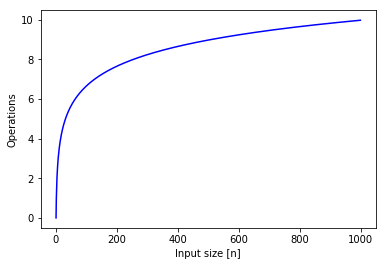

In [43]:
t = list(range(1,1000))
x = [1*e for e in t]
labels = [" lookup: ~n", " lookup_rec: ~log2(n)"]

import math
import matplotlib.pyplot as plt

y = [math.log2(el) for el in x]

#plt.plot(x,x,'r' , x,y,'b')
#plt.legend(labels)
#plt.xlabel("Input size [n]")
#plt.ylabel("Operations")
#plt.show()

plt.plot(x,y,'b', label= "lookup_rec")
#plt.legend(labels[1])
plt.xlabel("Input size [n]")
plt.ylabel("Operations")
plt.show()


$if start > end (n=0)$ $T(n) = c_1 + c_2 = c$

$uf start \leq end (n>0)$ $T(n) = T(n/2) + c_1 + c_3 + c_4 + c_6 + c_7 = T (n/2) + d$

$n = 2^{k} \Rightarrow k = log_{2}{n}$

$$T(n) = d \cdot log{n} + e$$

$$T(n) = a \cdot n + b$$

$$T(n) = f \cdot n^{2} + g \cdot n + h$$




In [1]:
import math

a = math.log2(10000)
print(a)

13.287712379549449


A cost function is simply a function from natural numbers to real numbers:

$$f(n) : \mathbb{N} \mapsto \mathbb{R}$$

$$f(n) = 10n^{3} + 2n^{2} + 7 \overset{?}{=} O(n^{3})$$


We need to prove that (i.e. find a c and m such that):

$$\exists c > 0, \exists m \geq 0 : f(n) \leq c\cdot n^3, \forall n \geq m$$



$$f(n) = 3n^{2} + 7n \overset{?}{=} \Theta(n^{2})$$


We need to prove that (i.e. find a c and m such that):

$$\exists c_1 > 0, \exists m_1 \geq 0 : f(n) \geq c_1 \cdot n^2, \forall n \geq m_1$$

and that 

$$\exists c_2 > 0, \exists m_2 \geq 0 : f(n) \leq c_2 \cdot n^2, \forall n \geq m_2$$

which is true for each $c_2 \geq 10$ and for all $n \geq 1$, hence $m_2 = 1$.


$$ n^{2} \neq O(n)$$

$$ n^{2} = O(n^{3})$$

If a problem is composed of two parts: 

* the first being $O(n \cdot log{n})$ 

* the second $O(n)$

the overall complexity is $O(n \cdot log{n} + n) = O(n \cdot log{n})$


$O(log{n}) \subset O(\sqrt[3]{n}) \subset O(\sqrt{n})$ 

$O(2^{n+1}) = O(2\cdot 2^{n}) = O(2^{n})$

**Example:**

$$ f(n) = n^4 + 4n^2 - 2 n + 1 = \Theta(n^4)$$




$$\sum_{i=0}^{n-1} n^2 = n^3$$


In [2]:
n = 4

tot = 0
for i in range(4):
    tot+=n**2
    
print("{} == {}".format(tot, n**3))

64 == 64


$$\sum_{i=0}^{n-1}\sum_{j=i}^{n-1}n = ?$$


In [14]:
n = range(1,11)

tot = 0
for k in n:
    tot = 0
    for i in range(k):
        for j in range(i,k):
            tot += k
    print(tot, end = " ")

1 6 18 40 75 126 196 288 405 550 

$$\sum_{j=i}^{i+\frac{n}{2} -1} j - i + 1 = 1 + 2 + ... + \frac{n}{2} = \sum_{j=0}^{\frac{n}{2}} j = \frac{1}{2}\frac{n}{2}(\frac{n}{2}+1) = \frac{n^2}{8} + \frac{n}{4} \geq \frac{n^2}{8}      \forall n \geq 0$$

Therefore:

$$\geq \sum_{i=0}^{n/2} \frac{n^2}{8} = \frac{n^3}{16} \geq c_1 n^3$$ 

This inequality is true $\forall n \geq m = 0$ and $c_1 \leq \frac{1}{16}$


In [26]:
i = 5
n= 12

tot = 0
for j in range(i,i+n//2):
    tot += j - i +1

tot1 = 0
for j in range(i,i+n//2):
    tot1 += n//2    
    
tot3 = 0
for j in range(1,n//2):
    tot3 += j
    
print("{} == {} == {}".format(tot,tot1, tot3))



21 == 36 == 15


In [21]:

    def max_sum_v4(A):
        max_so_far = 0 #Max found so far
        max_here = 0   #Max slice ending at cur pos

        for i in range(len(A)):
            max_here = max(A[i] + max_here, 0)
            max_so_far = max(max_so_far, max_here)
        return max_so_far
    
    

In [ ]:

def max_sum_v2(A):
    N = len(A)
    max_so_far = 0

    for i in range(N):
        tot = 0 #ACCUMULATOR!
        for j in range(i,N):
            tot = tot + A[j]
            max_so_far = max(max_so_far, tot)
    return max_so_far


In [8]:
def fact(n):
    res = 1
    for i in range(1,n+1):
        res = res * i
    return res

print(fact(5))
print(fact(10))
print(fact(20))
print(fact(30))
print(fact(40))

120
3628800
2432902008176640000
265252859812191058636308480000000
815915283247897734345611269596115894272000000000


In [3]:
def max_sum_v4(A):
    max_so_far = 0 #Max found so far
    max_here = 0   #Max slice ending at cur pos
    for i in range(len(A)):
        max_here = max(A[i] + max_here, 0)
        max_so_far = max(max_so_far, max_here)
    return max_so_far

A = [1,3,4,-8,2, 3,-1,3,4,-3,10,-3,2]
print("{}".format(A))
print(max_sum_v4(A))

[1, 3, 4, -8, 2, 3, -1, 3, 4, -3, 10, -3, 2]
18


## Karatsuba method for multiplications

$x = x_1 \cdot 2^{n/2} + x_2$

$y = y_1 \cdot 2^{n/2} + y_2$

$x \cdot y = x_1 y_1 \cdot 2^{n} + (x_1 y_2 + x_2 y_1)\cdot 2^{n/2} + x_2 y_2$

Let's compute:

$X = x_1 y_1$

$Y = x_2 y_2$

$Z = (x_1 + x_2) \cdot (y_1 + y_2) - X - Y \\= (x_1 y_1 + x_1 y_2 + x_2 y_1 + x_2 y_2)  - x_1 y_1 - x_2 y_2$

$x\cdot y = X\cdot2^{n} + Z\cdot2^{n/2} + Y$

**Example (decimal values):**

$1234 * 7721 = 12*10^{2}+34 \cdot 77*10^{2}+34 = 9527714$

$X = (12*77) = 924$

$Y = (21*34) = 714$

$Z = (12+34)*(77+21) - X - Y\\   = 46*98 - 924 -714 = 4508 - 924 -714 = 2870$

$1234 * 7721 = 924*10^{4} + 2870*10^{2} + 714 = 9527714$


